In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# 导入所需的库

iris = load_iris(as_frame=True)  # 加载鸢尾花数据集，并将数据集的特征存储为DataFrame（带有列名）格式
X = iris.data[["petal length (cm)", "petal width (cm)"]].values  # 选择数据集中的两个特征作为输入特征（花瓣长度和花瓣宽度）
y = (iris.target == 0)  # 创建目标向量，将类别为0（Setosa）的样本标记为True，其他类别标记为False

per_clf = Perceptron(random_state=42)  # 创建感知器分类器对象（单层神经网络）
per_clf.fit(X, y)  # 在输入特征 X 上训练感知器分类器，使其学习如何区分类别

X_new = [[2,0.5],[3,1]]  # 创建新的输入特征，用于预测
y_pred = per_clf.predict(X_new)  # 使用训练好的感知器分类器进行预测，得到预测的类别（True 或 False）

y_pred  # 打印预测结果


array([ True, False])

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [92]:
mlp_reg = MLPRegressor()
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [93]:
rmse

0.9537390641898797

In [94]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [95]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [96]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [97]:
X_train.shape
X_train.dtype

dtype('uint8')

In [98]:
X_train, X_valid, X_test = X_train/255., X_valid/255.,X_test/255.

In [99]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [100]:
class_names[y_train[0]]

'Ankle boot'

In [101]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [102]:
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=[28,28]),
	tf.keras.layers.Dense(300, activation='relu'),
	tf.keras.layers.Dense(100, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax')
])

In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_67 (Dense)            (None, 300)               235500    
                                                                 
 dense_68 (Dense)            (None, 100)               30100     
                                                                 
 dense_69 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.layers

In [105]:
hidden1=model.layers[1]
hidden1.name

'dense_67'

In [106]:
model.get_layer('dense_6') is hidden1

ValueError: No such layer: dense_6. Existing layers are: ['flatten_4', 'dense_67', 'dense_68', 'dense_69'].

In [107]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02405455,  0.04017343,  0.03235585, ...,  0.02844589,
        -0.04896566, -0.06235529],
       [ 0.03519075, -0.00486711, -0.02838149, ...,  0.04791113,
         0.04016913, -0.00018215],
       [-0.06744308,  0.05382313, -0.03267311, ...,  0.01394892,
         0.05986938, -0.06303319],
       ...,
       [-0.02839848,  0.03998582, -0.01450494, ..., -0.03716953,
        -0.05696781,  0.01288354],
       [-0.0303233 , -0.06118834,  0.01946061, ..., -0.04958537,
        -0.03349333,  0.00943143],
       [-0.0115624 ,  0.06063452,  0.01477159, ..., -0.05221858,
        -0.03342445,  0.00278684]], dtype=float32)

In [108]:
weights.shape

(784, 300)

In [109]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [110]:
biases.shape

(300,)

In [111]:
model.compile(loss="sparse_categorical_crossentropy",
	optimizer='sgd',
	metrics=["accuracy"])

In [112]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


In [113]:
history = model.fit(X_train, y_train, 
	epochs=3, 
	validation_data=(X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7206 - accuracy: 0.7623 - val_loss: 0.5014 - val_accuracy: 0.8276
Epoch 2/3
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4843 - accuracy: 0.8326 - val_loss: 0.4543 - val_accuracy: 0.8370
Epoch 3/3
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4378 - accuracy: 0.8468 - val_loss: 0.4194 - val_accuracy: 0.8506


In [114]:
import matplotlib.pyplot as plt
import pandas as pd

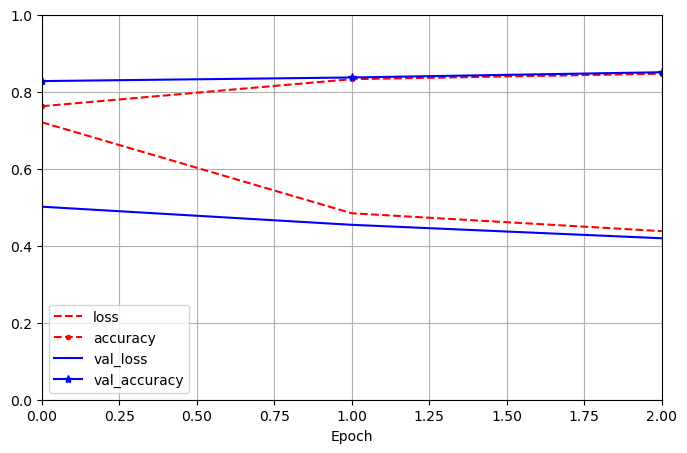

In [115]:
pd.DataFrame(history.history).plot(
	figsize=(8,5), xlim=[0,2], ylim=[0,1],grid=True, xlabel="Epoch",
	style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [116]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.4537 - accuracy: 0.8391


[0.45367631316185, 0.8391000032424927]

In [117]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 44ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.22, 0.  , 0.66],
       [0.  , 0.  , 0.85, 0.  , 0.03, 0.  , 0.12, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [118]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [119]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

regression

In [122]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model_1 = tf.keras.Sequential([
	norm_layer,
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model_1.fit(X_train, y_train, epochs=1, 
	validation_data=(X_valid, y_valid))
mse_test, rmse_test = model_1.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 113ms/step


In [123]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [124]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [125]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

ValueError: in user code:

    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/base_preprocessing_layer.py", line 123, in adapt_step  *
        self.update_state(data)
    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/layers/preprocessing/normalization.py", line 318, in update_state  **
        self.adapt_mean * existing_weight + batch_mean * batch_weight

    ValueError: Dimensions must be equal, but are 5 and 28 for '{{node add_1}} = AddV2[T=DT_FLOAT](mul, mul_1)' with input shapes: [5], [5,28].


In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_result

In [ ]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

In [78]:
import tensorflow as tf

dynamic

In [126]:
class WideAndDeepModel(tf.keras.Model):
	def __init__(self, units=30, activation='relu', **kwargs):
		super().__init__(**kwargs)
		self.norm_layer_wide = tf.keras.layers.Normalization()
		self.norm_layer_deep = tf.keras.layers.Normalization()
		self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
		self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
		self.main_output = tf.keras.layers.Dense(1)
		self.aux_output = tf.keras.layers.Dense(1)
	
	def call(self, inputs):
		input_wide, input_deep = inputs
		norm_wide = self.norm_layer_wide(input_wide)
		norm_deep = self.norm_layer_deep(input_deep)
		hidden1 = self.hidden1(norm_deep)
		hidden2 = self.hidden2(hidden1)
		concat = tf.keras.layers.concatenate([norm_wide, hidden2])
		output = self.main_output(concat)
		aux_output = self.aux_output(hidden2)
		return output, aux_output

In [84]:
model = WideAndDeepModel(30, activation="relu", name="my_keras_model")

In [127]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [128]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

ValueError: in user code:

    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 1 of layer "model_10" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 26, 28)


In [129]:
checkpoints_cb = tf.keras.callbacks.ModelCheckpoint("my_check_points",
	save_weights_only=True)
history = model.fit([...], callbacks=[checkpoints_cb])

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'ellipsis'>"}), <class 'NoneType'>

In [130]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([...], callbacks=[checkpoints_cb, early_stopping_cb])

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'ellipsis'>"}), <class 'NoneType'>

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs):
		ratio = logs["val_loss"] / logs["loss"]
		print(f'Epoch={epoch}, val/train={ratio:.2f}')

In [4]:
from pathlib import Path
from time import strftime
import tensorflow as tf

2023-09-01 02:20:10.879455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def get_run_logdir(root_logdir="my_logs"):
	return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")
run_logdir = get_run_logdir()
run_logdir

PosixPath('my_logs/run_2023_09_01_02_20_15')

In [6]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(200,200))
history = model.fit([...], callbacks=[tensorboard_cb])

2023-09-01 02:20:57.825149: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-09-01 02:20:57.825194: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-09-01 02:20:57.826484: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


NameError: name 'model' is not defined